# SC1015 Cardiovascular Problem Statement

---

### Predicting the risks of different age groups based on their whether they smoke, drink alcohol, or have high cholestrol

In [119]:
import numpy as np 
import pandas as pd
import math
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Import ML lib
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
sb.set() # set the default Seaborn style for graphics

In [3]:
data = pd.read_csv('heart_data.csv')
data.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Cleaning Of Data
#### Cleaning Steps
    1. Height Between 165cm and 175cm
        Average Singaporean Height is around 168cm
    2. Weight Between 60Kg and 90Kg
    3. Convert Age from Days to Years

In [4]:
#Cleaning Data
cleaned = data.query('height > 165 and height < 175 and weight > 60 and weight < 90 and gender == 1')
#Converting Age from Days to Years
for i, row in cleaned.iterrows():
    cleaned.at[i,'age'] = cleaned.at[i,'age'] / 365
cleaned.head()
cleaned.describe()
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8079 entries, 10 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        8079 non-null   int64  
 1   id           8079 non-null   int64  
 2   age          8079 non-null   int64  
 3   gender       8079 non-null   int64  
 4   height       8079 non-null   int64  
 5   weight       8079 non-null   float64
 6   ap_hi        8079 non-null   int64  
 7   ap_lo        8079 non-null   int64  
 8   cholesterol  8079 non-null   int64  
 9   gluc         8079 non-null   int64  
 10  smoke        8079 non-null   int64  
 11  alco         8079 non-null   int64  
 12  active       8079 non-null   int64  
 13  cardio       8079 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 1.2 MB


# Visualisation of Data Before and After cleaning
## Before

<AxesSubplot:xlabel='age'>

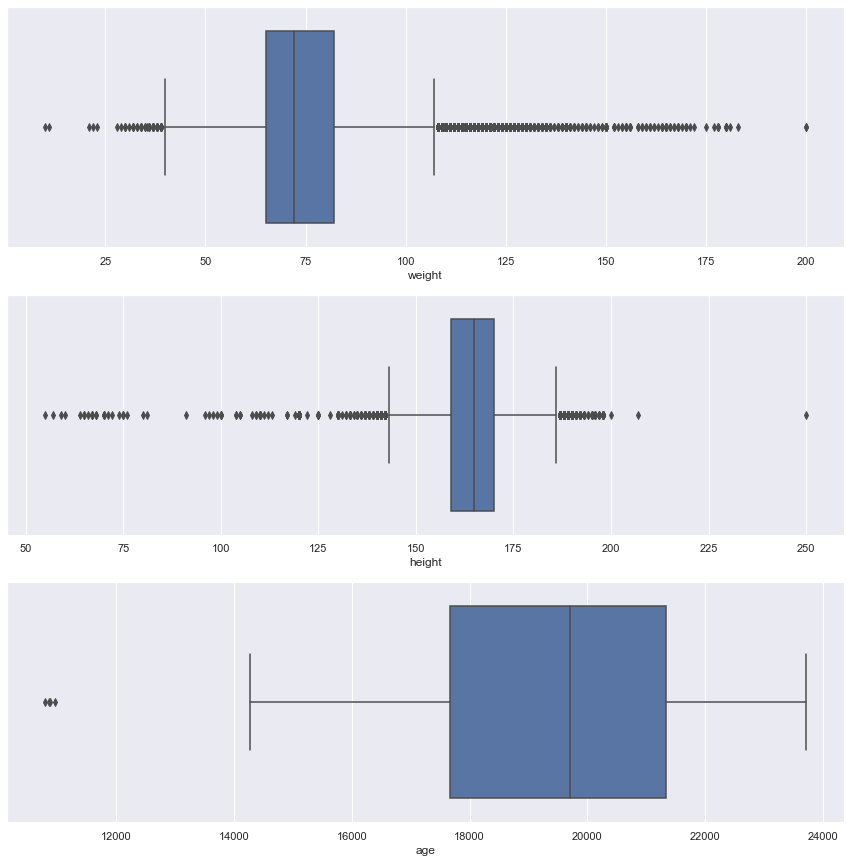

In [5]:
f, axes = plt.subplots(3, 1, figsize=(15, 15))
sb.boxplot(data = data, x = 'weight', ax = axes[0])
sb.boxplot(data = data, x = 'height', ax = axes[1])
sb.boxplot(data = data, x = 'age', ax = axes[2])

## After

<AxesSubplot:xlabel='age'>

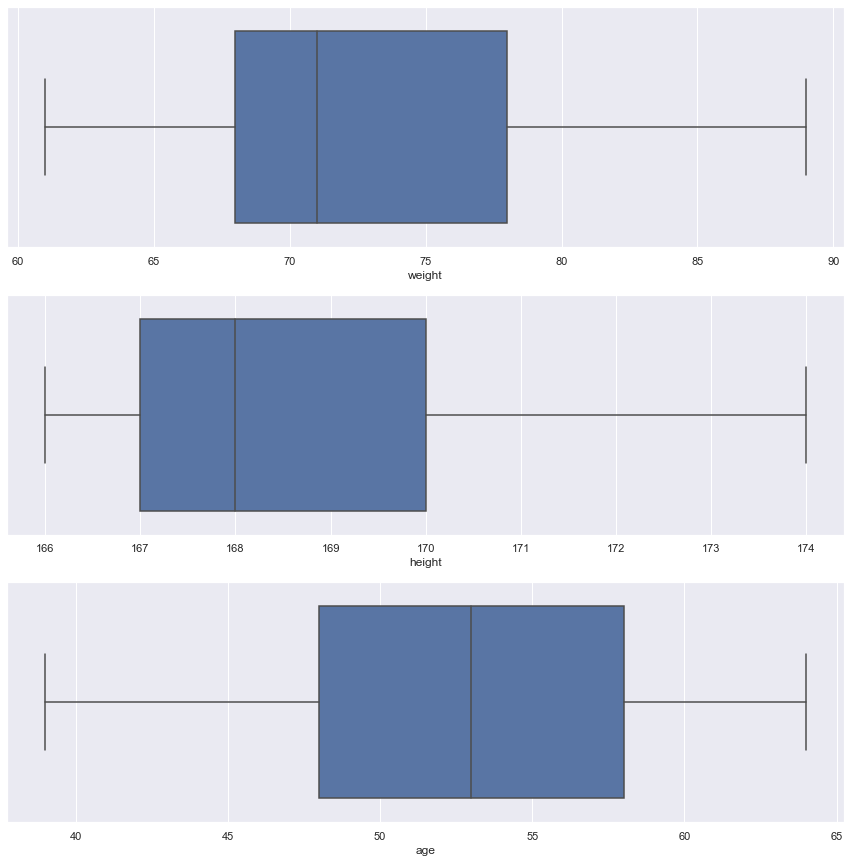

In [6]:
f, axes = plt.subplots(3, 1, figsize=(15, 15))
sb.boxplot(data = cleaned, x = 'weight', ax = axes[0])
sb.boxplot(data = cleaned, x = 'height', ax = axes[1])
sb.boxplot(data = cleaned, x = 'age', ax = axes[2])

# Exploratory Data Analysis

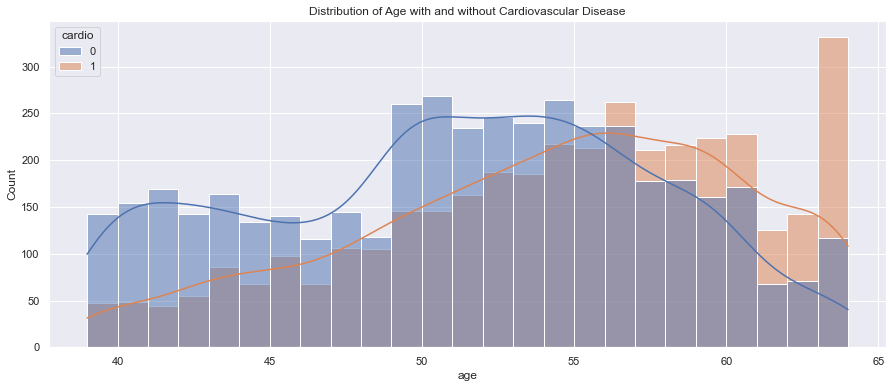

In [7]:
plt.figure(figsize=(15,6))
sb.histplot(data=cleaned, x='age',hue='cardio', binwidth = 1, kde=True)
plt.title("Distribution of Age with and without Cardiovascular Disease")
plt.show()

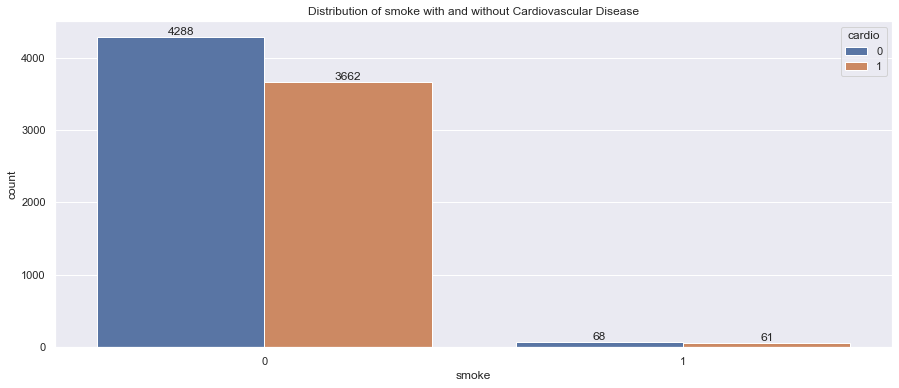

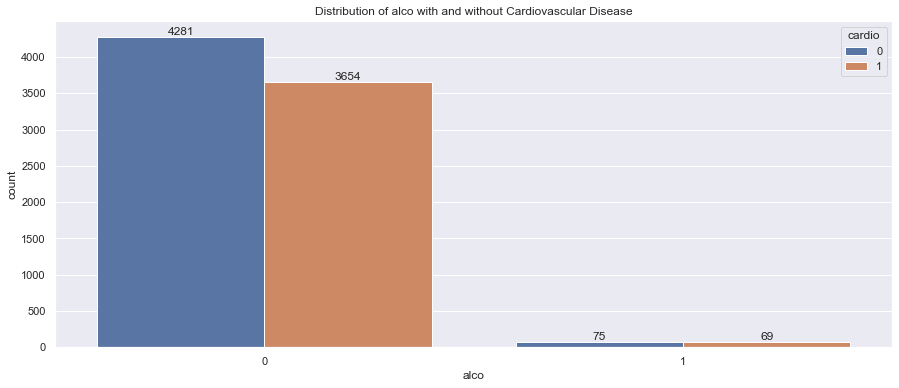

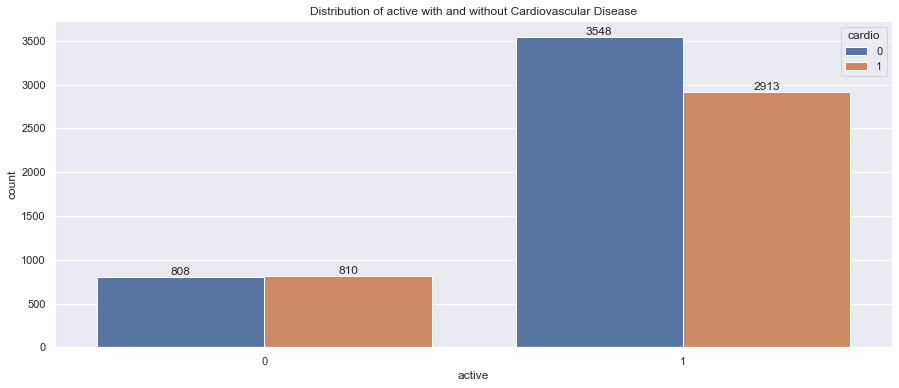

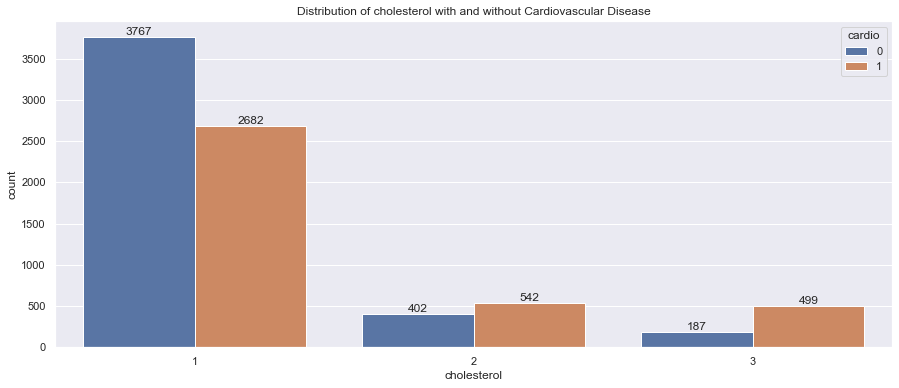

In [32]:
list = ["smoke", "alco", "active", "cholesterol"]
for variable in list:
    plt.figure(figsize=(15,6))
    ax = sb.countplot(x=variable, hue="cardio",data = cleaned)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.title("Distribution of {} with and without Cardiovascular Disease".format(variable) )
    plt.show()
#Add Visualisation of each category with cardio and without

# Machine Learning
##### We use 3 types of Machine Learning
    1. Gradient Boosting Classifier
        Accuracy: 0.65
    2. Logistic Regression
        Accuracy: 0.64
    3. SGD Classifier
        Accuracy: 0.52
    
Since Gradient Boosting Classifier has the highest accuracy out of the 3 we will use it

In [134]:
predictor = pd.DataFrame(cleaned[["smoke", "alco", "active", "cholesterol", "age"]])
response = pd.DataFrame(cleaned['cardio'])

xTrain, xVal, yTrain, yVal = train_test_split(predictor, response, test_size = 0.2, random_state=123)
MLList = {}

In [135]:
classifier = GradientBoostingClassifier(random_state=42)
predictor = classifier.fit(xTrain, yTrain)
yPred = predictor.predict(xVal)
accuracy = accuracy_score(yVal, yPred)
MLList['GradientBoostingClassifier'] = accuracy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [136]:
classifier = LogisticRegression(random_state=42)
predictor = classifier.fit(xTrain, yTrain)
yPred = predictor.predict(xVal)
accuracy = accuracy_score(yVal, yPred)
MLList['LogisticRegression'] = accuracy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [137]:
classifier = SGDClassifier(random_state=42)
predictor = classifier.fit(xTrain, yTrain)
yPred = predictor.predict(xVal)
accuracy = accuracy_score(yVal, yPred)
MLList['SGDClassifier'] = accuracy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [138]:
for ml, acc in MLList.items():
    print("{} has a accuracy of \t".format(ml),acc)

GradientBoostingClassifier has a accuracy of 	 0.6398514851485149
LogisticRegression has a accuracy of 	 0.6386138613861386
SGDClassifier has a accuracy of 	 0.49257425742574257
